<a href="https://colab.research.google.com/github/Brycealong/Brycealong/blob/main/Copy2_of_single_cell_analysis_complete_class_integrated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init

In [ ]:
!rm -r raw_counts/
!rm -r singlecell/
!rm *.csv
!rm *.zip

In [1]:
!pip install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.2 MB/s 
     |████████████████████████████████| 88 kB 8.6 MB/s 
     |████████████████████████████████| 96 kB 6.0 MB/s 
     |████████████████████████████████| 11.2 MB 72.4 MB/s 
     |████████████████████████████████| 965 kB 78.3 MB/s 
     |████████████████████████████████| 1.1 MB 75.7 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=3554bccb08f19413216be56b00b3de3ddcd5ed38f56ed759e79b1effec4a00ae
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=bdfee9aa6714f5ade372215e35184de3226fc42dfca678416ccad71184c6e168
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f

In [1]:
!pip install scikit-misc --force

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.8 MB 1.8 MB/s 
     |████████████████████████████████| 15.7 MB 80.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


In [2]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install scvi-tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 290 kB 5.2 MB/s 
     |████████████████████████████████| 708 kB 80.9 MB/s 
     |████████████████████████████████| 237 kB 80.8 MB/s 
     |████████████████████████████████| 529 kB 75.3 MB/s 
     |████████████████████████████████| 292 kB 83.7 MB/s 
     |████████████████████████████████| 77 kB 8.7 MB/s 
     |████████████████████████████████| 185 kB 76.5 MB/s 
     |████████████████████████████████| 722 kB 71.8 MB/s 
     |████████████████████████████████| 145 kB 82.2 MB/s 
     |████████████████████████████████| 51 kB 7.8 MB/s 
     |████████████████████████████████| 1.6 MB 80.9 MB/s 
     |████████████████████████████████| 85 kB 5.1 MB/s 
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19896 sha256=3ca14dceab570e8598e70e8a4288d86aa19eb4e0a6ce4af09d6c0d5911f6fc33
  Stored in directory: /root/.cache/pip/wheels/4b/a1/89/8c863c

In [4]:
!ls -a

.  ..  .config	sample_data


In [5]:
!git clone https://github.com/Brycealong/singlecell.git
!mv singlecell/raw_counts .

Cloning into 'singlecell'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 40 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (40/40), done.


In [6]:
!ls

raw_counts  sample_data  singlecell


In [7]:
!for i in raw_counts/*; do unzip ${i}; done
!mv *.csv raw_counts/

Archive:  raw_counts/GSM5226574_C51ctr_raw_counts.csv.zip
  inflating: GSM5226574_C51ctr_raw_counts.csv  
Archive:  raw_counts/GSM5226575_C52ctr_raw_counts.csv.zip
  inflating: GSM5226575_C52ctr_raw_counts.csv  
Archive:  raw_counts/GSM5226576_C53ctr_raw_counts.csv.zip
  inflating: GSM5226576_C53ctr_raw_counts.csv  
Archive:  raw_counts/GSM5226577_C54ctr_raw_counts.csv.zip
  inflating: GSM5226577_C54ctr_raw_counts.csv  
Archive:  raw_counts/GSM5226578_C55ctr_raw_counts.csv.zip
  inflating: GSM5226578_C55ctr_raw_counts.csv  
Archive:  raw_counts/GSM5226579_C56ctr_raw_counts.csv.zip
  inflating: GSM5226579_C56ctr_raw_counts.csv  
Archive:  raw_counts/GSM5226580_C57ctr_raw_counts.csv.zip
  inflating: GSM5226580_C57ctr_raw_counts.csv  
Archive:  raw_counts/GSM5226581_L01cov_raw_counts.csv.zip
  inflating: GSM5226581_L01cov_raw_counts.csv  
Archive:  raw_counts/GSM5226582_L03cov_raw_counts.csv.zip
  inflating: GSM5226582_L03cov_raw_counts.csv  
Archive:  raw_counts/GSM5226583_L04cov_raw_cou

# Integration

In [8]:
import scanpy as sc
import scvi
import pandas as pd
import numpy as np

INFO:pytorch_lightning.utilities.seed:Global seed set to 0
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/warnings.py:54: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  "pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6"
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [9]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"

In [10]:
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [11]:
def pp(csv_path):
    adata = sc.read_csv(csv_path).T

    # doublet check
    sc.pp.filter_genes(adata, min_cells = 10)
    sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')
    scvi.model.SCVI.setup_anndata(adata)
    vae = scvi.model.SCVI(adata)
    vae.train()
    solo = scvi.external.SOLO.from_scvi_model(vae)
    solo.train()
    df = solo.predict()
    df['prediction'] = solo.predict(soft = False)
    df.index = df.index.map(lambda x: x[:-2])
    df['dif'] = df.doublet - df.singlet
    doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
    
    adata = sc.read_csv(csv_path).T
    adata.obs['Sample'] = csv_path.split('_')[2] #'raw_counts/GSM5226574_C51ctr_raw_counts.csv'
    
    adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
    adata = adata[~adata.obs.doublet]
    # doublet check done!

    sc.pp.filter_cells(adata, min_genes=200) #get rid of cells with fewer than 200 genes
    #sc.pp.filter_genes(adata, min_cells=3) #get rid of genes that are found in fewer than 3 cells
    adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
    adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]
    adata = adata[adata.obs.pct_counts_mt < 20]
    adata = adata[adata.obs.pct_counts_ribo < 2]

    return adata

In [12]:
import os

In [13]:
os.listdir('raw_counts/')

['GSM5226590_L10cov_raw_counts.csv.zip',
 'GSM5226592_L12cov_raw_counts.csv',
 'GSM5226591_L11cov_raw_counts.csv',
 'GSM5226584_L04covaddon_raw_counts.csv',
 'GSM5226574_C51ctr_raw_counts.csv',
 'GSM5226575_C52ctr_raw_counts.csv.zip',
 'GSM5226590_L10cov_raw_counts.csv',
 'GSM5226600_L22cov_raw_counts.csv.zip',
 'GSM5226591_L11cov_raw_counts.csv.zip',
 'GSM5226579_C56ctr_raw_counts.csv',
 'GSM5226578_C55ctr_raw_counts.csv.zip',
 'GSM5226578_C55ctr_raw_counts.csv',
 'GSM5226588_L08cov_raw_counts.csv',
 'GSM5226582_L03cov_raw_counts.csv.zip',
 'GSM5226592_L12cov_raw_counts.csv.zip',
 'GSM5226579_C56ctr_raw_counts.csv.zip',
 'GSM5226580_C57ctr_raw_counts.csv',
 'GSM5226576_C53ctr_raw_counts.csv.zip',
 'GSM5226574_C51ctr_raw_counts.csv.zip',
 'GSM5226583_L04cov_raw_counts.csv',
 'GSM5226586_L06cov_raw_counts.csv.zip',
 'GSM5226598_L19cov_raw_counts.csv',
 'GSM5226577_C54ctr_raw_counts.csv.zip',
 'GSM5226587_L07cov_raw_counts.csv',
 'GSM5226588_L08cov_raw_counts.csv.zip',
 'GSM5226596_L17co

In [14]:
!rm raw_counts/*.zip

In [15]:
os.listdir('raw_counts/')

['GSM5226592_L12cov_raw_counts.csv',
 'GSM5226591_L11cov_raw_counts.csv',
 'GSM5226584_L04covaddon_raw_counts.csv',
 'GSM5226574_C51ctr_raw_counts.csv',
 'GSM5226590_L10cov_raw_counts.csv',
 'GSM5226579_C56ctr_raw_counts.csv',
 'GSM5226578_C55ctr_raw_counts.csv',
 'GSM5226588_L08cov_raw_counts.csv',
 'GSM5226580_C57ctr_raw_counts.csv',
 'GSM5226583_L04cov_raw_counts.csv',
 'GSM5226598_L19cov_raw_counts.csv',
 'GSM5226587_L07cov_raw_counts.csv',
 'GSM5226581_L01cov_raw_counts.csv',
 'GSM5226576_C53ctr_raw_counts.csv',
 'GSM5226599_L21cov_raw_counts.csv',
 'GSM5226597_L18cov_raw_counts.csv',
 'GSM5226589_L09cov_raw_counts.csv',
 'GSM5226600_L22cov_raw_counts.csv',
 'GSM5226575_C52ctr_raw_counts.csv',
 'GSM5226595_L16cov_raw_counts.csv',
 'GSM5226593_L13cov_raw_counts.csv',
 'GSM5226594_L15cov_raw_counts.csv',
 'GSM5226577_C54ctr_raw_counts.csv',
 'GSM5226585_L05cov_raw_counts.csv',
 'GSM5226582_L03cov_raw_counts.csv',
 'GSM5226586_L06cov_raw_counts.csv',
 'GSM5226596_L17cov_raw_counts.cs

In [16]:
len(os.listdir('raw_counts/'))

27

In [17]:
out = []
for file in os.listdir('raw_counts/'):
    out.append(pp('raw_counts/' + file))

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:19<00:00,  3.14it/s, loss=316, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:19<00:00,  2.86it/s, loss=316, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 146/400:  36%|███▋      | 146/400 [00:50<01:28,  2.87it/s, loss=0.31, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.301. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [01:57<00:00,  3.46it/s, loss=355, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:57<00:00,  3.41it/s, loss=355, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 198/400:  50%|████▉     | 198/400 [00:59<01:00,  3.32it/s, loss=0.34, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.351. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:38<00:00,  2.47it/s, loss=334, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:38<00:00,  2.52it/s, loss=334, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 306/400:  76%|███████▋  | 306/400 [02:05<00:38,  2.44it/s, loss=0.297, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.272. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [03:23<00:00,  1.97it/s, loss=317, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [03:24<00:00,  1.96it/s, loss=317, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 141/400:  35%|███▌      | 141/400 [01:16<02:20,  1.85it/s, loss=0.305, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.302. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [00:56<00:00,  7.28it/s, loss=313, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [00:56<00:00,  7.08it/s, loss=313, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 261/400:  65%|██████▌   | 261/400 [00:39<00:20,  6.68it/s, loss=0.282, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.290. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:19<00:00,  2.81it/s, loss=329, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:19<00:00,  2.87it/s, loss=329, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 359/400:  90%|████████▉ | 359/400 [02:11<00:15,  2.73it/s, loss=0.253, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.230. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [03:09<00:00,  2.12it/s, loss=310, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [03:09<00:00,  2.11it/s, loss=310, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 155/400:  39%|███▉      | 155/400 [01:18<02:03,  1.98it/s, loss=0.231, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.241. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:14<00:00,  2.91it/s, loss=332, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:14<00:00,  2.98it/s, loss=332, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 167/400:  42%|████▏     | 167/400 [00:59<01:23,  2.79it/s, loss=0.295, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.287. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:31<00:00,  2.64it/s, loss=285, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:31<00:00,  2.63it/s, loss=285, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 340/400:  85%|████████▌ | 340/400 [02:20<00:24,  2.41it/s, loss=0.208, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.240. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [01:57<00:00,  3.40it/s, loss=258, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:57<00:00,  3.40it/s, loss=258, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 314/400:  78%|███████▊  | 314/400 [01:38<00:27,  3.17it/s, loss=0.285, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.239. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [01:22<00:00,  4.84it/s, loss=420, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:22<00:00,  4.85it/s, loss=420, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 182/400:  46%|████▌     | 182/400 [00:40<00:48,  4.54it/s, loss=0.333, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.348. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:39<00:00,  2.51it/s, loss=347, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:39<00:00,  2.51it/s, loss=347, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 154/400:  38%|███▊      | 154/400 [01:07<01:47,  2.29it/s, loss=0.338, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.361. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [01:39<00:00,  3.99it/s, loss=332, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:39<00:00,  4.00it/s, loss=332, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 284/400:  71%|███████   | 284/400 [01:15<00:30,  3.75it/s, loss=0.268, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.287. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [03:45<00:00,  1.78it/s, loss=338, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [03:45<00:00,  1.78it/s, loss=338, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 250/400:  62%|██████▎   | 250/400 [02:31<01:30,  1.65it/s, loss=0.298, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.295. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [01:52<00:00,  3.52it/s, loss=322, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:52<00:00,  3.55it/s, loss=322, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 242/400:  60%|██████    | 242/400 [01:12<00:47,  3.33it/s, loss=0.313, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.286. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [01:31<00:00,  4.36it/s, loss=303, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:31<00:00,  4.39it/s, loss=303, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 259/400:  65%|██████▍   | 259/400 [01:04<00:35,  4.02it/s, loss=0.211, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.218. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [01:56<00:00,  3.46it/s, loss=336, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:56<00:00,  3.42it/s, loss=336, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 244/400:  61%|██████    | 244/400 [01:16<00:49,  3.18it/s, loss=0.31, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.233. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [03:40<00:00,  1.81it/s, loss=339, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [03:40<00:00,  1.81it/s, loss=339, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 203/400:  51%|█████     | 203/400 [02:01<01:57,  1.68it/s, loss=0.333, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.313. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:23<00:00,  2.79it/s, loss=395, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:23<00:00,  2.79it/s, loss=395, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 204/400:  51%|█████     | 204/400 [01:19<01:16,  2.57it/s, loss=0.309, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.291. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [01:00<00:00,  6.57it/s, loss=378, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:00<00:00,  6.57it/s, loss=378, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 246/400:  62%|██████▏   | 246/400 [00:40<00:25,  6.03it/s, loss=0.302, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.312. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:36<00:00,  2.55it/s, loss=365, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:36<00:00,  2.55it/s, loss=365, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 296/400:  74%|███████▍  | 296/400 [02:04<00:43,  2.38it/s, loss=0.305, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.302. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:10<00:00,  3.06it/s, loss=351, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:10<00:00,  3.05it/s, loss=351, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 371/400:  93%|█████████▎| 371/400 [02:09<00:10,  2.85it/s, loss=0.287, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.278. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:19<00:00,  2.87it/s, loss=310, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:19<00:00,  2.88it/s, loss=310, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 181/400:  45%|████▌     | 181/400 [01:08<01:22,  2.64it/s, loss=0.239, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.221. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [01:40<00:00,  4.03it/s, loss=344, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:40<00:00,  3.99it/s, loss=344, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 254/400:  64%|██████▎   | 254/400 [01:08<00:39,  3.69it/s, loss=0.355, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.321. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:45<00:00,  2.44it/s, loss=465, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:45<00:00,  2.41it/s, loss=465, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 196/400:  49%|████▉     | 196/400 [01:25<01:29,  2.28it/s, loss=0.335, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.350. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [04:02<00:00,  1.63it/s, loss=356, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [04:02<00:00,  1.65it/s, loss=356, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 195/400:  49%|████▉     | 195/400 [02:06<02:12,  1.55it/s, loss=0.303, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.299. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:28<00:00,  2.71it/s, loss=342, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:28<00:00,  2.69it/s, loss=342, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 222/400:  56%|█████▌    | 222/400 [01:29<01:11,  2.48it/s, loss=0.253, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.272. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


In [20]:
out[0]

View of AnnData object with n_obs × n_vars = 3195 × 34546
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [18]:
adata = sc.concat(out)

In [19]:
adata

AnnData object with n_obs × n_vars = 99249 × 34546
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'

In [21]:
adata.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
ATCCACCGTGCCGAAA-1_19,L12cov,False,2185,2185,4659.0,0.0,0.0,6.0,0.128783
TCATTTGTCCAACTGA-1_19,L12cov,False,2168,2168,4541.0,0.0,0.0,31.0,0.682669
AAGGAATTCTCCTGCA-1_19,L12cov,False,2200,2200,4477.0,0.0,0.0,23.0,0.513737
CAACGATGTCTACACA-1_19,L12cov,False,2200,2200,4467.0,0.0,0.0,27.0,0.604433
TCATCCGCACTGTCCT-1_19,L12cov,False,2195,2195,4382.0,0.0,0.0,6.0,0.136924
...,...,...,...,...,...,...,...,...,...
CGTGTCTTCTCGCAGG-1_23,L17cov,False,360,360,436.0,0.0,0.0,5.0,1.146789
GATGACTAGTTCTCTT-1_23,L17cov,False,338,338,401.0,0.0,0.0,0.0,0.000000
TCGTCCACAGGGAATC-1_23,L17cov,False,302,302,415.0,0.0,0.0,0.0,0.000000
TAACCAGCAGTTGTTG-1_23,L17cov,False,310,310,403.0,0.0,0.0,1.0,0.248139


In [24]:
adata.obs.Sample.value_counts()

C53ctr         6275
L22cov         5803
L06cov         5744
C51ctr         5525
C55ctr         5141
L13cov         4330
C57ctr         4260
L07cov         4238
L04covaddon    4134
C52ctr         4035
C54ctr         3951
L17cov         3923
L03cov         3619
C56ctr         3615
L15cov         3562
L08cov         3396
L12cov         3195
L04cov         3115
L09cov         3079
L21cov         2969
L01cov         2748
L11cov         2500
L05cov         2500
L18cov         2434
L19cov         2184
L16cov         1592
L10cov         1382
Name: Sample, dtype: int64

In [25]:
sc.pp.filter_genes(adata, min_cells = 10)

In [30]:
adata.X

<99249x29044 sparse matrix of type '<class 'numpy.float32'>'
	with 81052184 stored elements in Compressed Sparse Row format>

Save memory.

In [27]:
from scipy.sparse import csr_matrix

In [28]:
adata.X = csr_matrix(adata.X)

In [29]:
adata.X

<99249x29044 sparse matrix of type '<class 'numpy.float32'>'
	with 81052184 stored elements in Compressed Sparse Row format>

In [ ]:
adata.write_h5ad('combined.h5ad')

In [ ]:
########################################################

In [ ]:
import scanpy as sc
import scvi
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
adata = sc.read_h5ad('combined.h5ad')
adata

In [31]:
adata.obs.groupby('Sample').count()

,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
Sample,,,,,,,,
C51ctr,5525,5525,5525,5525,5525,5525,5525,5525
C52ctr,4035,4035,4035,4035,4035,4035,4035,4035
C53ctr,6275,6275,6275,6275,6275,6275,6275,6275
C54ctr,3951,3951,3951,3951,3951,3951,3951,3951
C55ctr,5141,5141,5141,5141,5141,5141,5141,5141
C56ctr,3615,3615,3615,3615,3615,3615,3615,3615
C57ctr,4260,4260,4260,4260,4260,4260,4260,4260
L01cov,2748,2748,2748,2748,2748,2748,2748,2748
L03cov,3619,3619,3619,3619,3619,3619,3619,3619


In [ ]:
adata

In [32]:
sc.pp.filter_genes(adata, min_cells = 100) # narrow genes down

In [33]:
adata

AnnData object with n_obs × n_vars = 99249 × 20631
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'

In [34]:
adata.layers['counts'] = adata.X.copy()

In [35]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata

In [36]:
adata.obs.head()

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
ATCCACCGTGCCGAAA-1_19,L12cov,False,2185,2185,4659.0,0.0,0.0,6.0,0.128783
TCATTTGTCCAACTGA-1_19,L12cov,False,2168,2168,4541.0,0.0,0.0,31.0,0.682669
AAGGAATTCTCCTGCA-1_19,L12cov,False,2200,2200,4477.0,0.0,0.0,23.0,0.513737
CAACGATGTCTACACA-1_19,L12cov,False,2200,2200,4467.0,0.0,0.0,27.0,0.604433
TCATCCGCACTGTCCT-1_19,L12cov,False,2195,2195,4382.0,0.0,0.0,6.0,0.136924


In [37]:
adata

AnnData object with n_obs × n_vars = 99249 × 20631
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'
    uns: 'log1p'
    layers: 'counts'

In [ ]:
# sc.pp.highly_variable_genes(adata, n_top_genes=3000, subset = True, layer = 'counts',
#                            flavor = "seurat_v3", batch_key="Sample") #no batch_key if one sample

In [38]:
scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["Sample"],
                             continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo'])
# categorical_covariate_keys=["Sample", "batch", "technology"],

In [39]:
model = scvi.model.SCVI(adata)

In [40]:
model.train() #may take a while without GPU

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_training_mixin.py:68: UserWarning: max_epochs=81 is less than n_epochs_kl_warmup=400. The max_kl_weight will not be reached during training.
  _WARNING_MESSAGE.format(mode="epochs", max=max_epochs, warm_up=400)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 81/81: 100%|██████████| 81/81 [16:23<00:00, 12.11s/it, loss=2.72e+03, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=81` reached.


Epoch 81/81: 100%|██████████| 81/81 [16:23<00:00, 12.14s/it, loss=2.72e+03, v_num=1]


In [43]:
model.get_latent_representation()

array([[-2.4730184 ,  1.7731848 , -1.0216448 , ...,  0.17255491,
         0.00588137,  1.3979199 ],
       [ 1.7147579 , -1.527095  , -2.2534094 , ..., -0.90159225,
        -1.1094884 , -0.5134579 ],
       [-1.7348993 ,  2.223586  , -0.5784172 , ..., -0.20913261,
        -0.33682215,  2.156432  ],
       ...,
       [-0.21624678, -0.27186334, -1.4597495 , ..., -0.8877274 ,
         2.4043093 ,  1.3369511 ],
       [-0.9986282 , -2.4821815 ,  0.2517718 , ...,  0.26636982,
         0.0077723 , -0.1503537 ],
       [-3.1348143 , -3.8663626 ,  0.9374548 , ...,  0.02114022,
        -0.44362533,  0.12204562]], dtype=float32)

In [42]:
model.get_latent_representation().shape

(99249, 10)

In [44]:
adata.obsm['X_scVI'] = model.get_latent_representation()

In [45]:
adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

In [46]:
sc.pp.neighbors(adata, use_rep = 'X_scVI')

In [48]:
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.0 MB/s 
     |████████████████████████████████| 3.2 MB 75.6 MB/s 


In [49]:
sc.tl.umap(adata)

In [50]:
sc.tl.leiden(adata, resolution = 0.5)

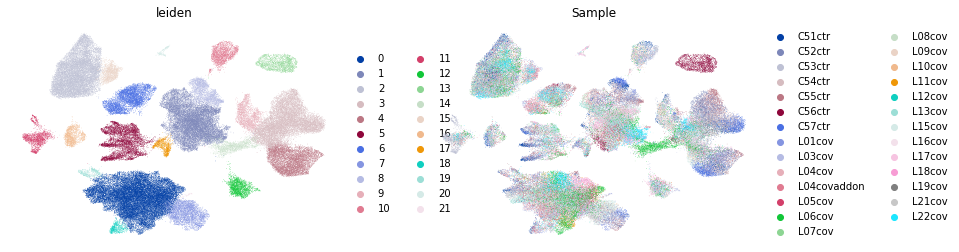

In [51]:
sc.pl.umap(adata, color = ['leiden', 'Sample'], frameon = False)

In [ ]:
adata.write_h5ad('integrated.h5ad')

# Find markers/ label cell types

This block below should be run dynamically when you find some information on how to do clusters.

In [52]:
sc.tl.leiden(adata, resolution = 1)

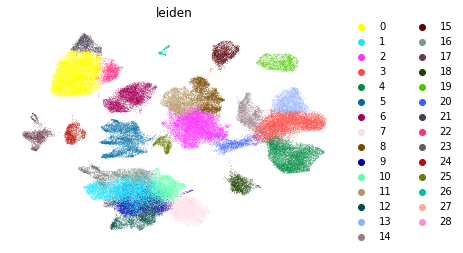

In [55]:
sc.pl.umap(adata, color = ['leiden'], frameon = False)

In [53]:
sc.tl.rank_genes_groups(adata, 'leiden')

/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

In [ ]:
#sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [56]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,PTPRC,165.756287,4.271375,0.000000,0.000000
1,0,PARP8,142.217804,4.349547,0.000000,0.000000
2,0,FYN,141.591232,4.595118,0.000000,0.000000
3,0,SKAP1,140.975616,5.866331,0.000000,0.000000
4,0,ARHGAP15,130.009476,3.784562,0.000000,0.000000
...,...,...,...,...,...,...
578234,28,EPGN,2.304475,6.659119,0.026335,0.049112
578235,28,ELMOD3,2.301667,1.999429,0.026507,0.049423
578236,28,ZMYM4,2.299764,1.127984,0.026623,0.049634
578237,28,PLA2G12A,2.298502,2.800107,0.026704,0.049782


In [57]:
adata.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden
ATCCACCGTGCCGAAA-1_19,L12cov,False,2185,2185,4659.0,0.0,0.0,6.0,0.128783,0,0,2
TCATTTGTCCAACTGA-1_19,L12cov,False,2168,2168,4541.0,0.0,0.0,31.0,0.682669,0,0,3
AAGGAATTCTCCTGCA-1_19,L12cov,False,2200,2200,4477.0,0.0,0.0,23.0,0.513737,0,0,2
CAACGATGTCTACACA-1_19,L12cov,False,2200,2200,4467.0,0.0,0.0,27.0,0.604433,0,0,2
TCATCCGCACTGTCCT-1_19,L12cov,False,2195,2195,4382.0,0.0,0.0,6.0,0.136924,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
CGTGTCTTCTCGCAGG-1_23,L17cov,False,360,360,436.0,0.0,0.0,5.0,1.146789,0,0,11
GATGACTAGTTCTCTT-1_23,L17cov,False,338,338,401.0,0.0,0.0,0.0,0.000000,0,0,10
TCGTCCACAGGGAATC-1_23,L17cov,False,302,302,415.0,0.0,0.0,0.0,0.000000,0,0,2
TAACCAGCAGTTGTTG-1_23,L17cov,False,310,310,403.0,0.0,0.0,1.0,0.248139,0,0,18


In [ ]:
adata

In [58]:
markers_scvi = model.differential_expression(groupby = 'leiden')
markers_scvi

DE...: 100%|██████████| 29/29 [04:40<00:00,  9.66s/it]


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
AC064834.1,0.9978,0.0022,6.117091,0.000044,0.000002,0.0,0.25,5.378971,5.404977,2.111214,...,0.011104,0.000788,0.007175,0.000663,0.157644,0.006330,True,0 vs Rest,0,Rest
UBASH3A,0.9976,0.0024,6.029880,0.000116,0.000004,0.0,0.25,5.959795,6.068064,1.917534,...,0.079439,0.002776,0.072777,0.002376,1.068574,0.022018,True,0 vs Rest,0,Rest
TRAT1,0.9974,0.0026,5.949637,0.000123,0.000003,0.0,0.25,6.596754,6.668725,2.124509,...,0.102845,0.002068,0.091996,0.001942,1.517024,0.020644,True,0 vs Rest,0,Rest
CAMK4,0.9972,0.0028,5.875328,0.001307,0.000033,0.0,0.25,7.173083,7.229955,2.308269,...,0.886107,0.022983,0.474417,0.012977,13.039144,0.202690,True,0 vs Rest,0,Rest
GPR171,0.9970,0.0030,5.806135,0.000081,0.000003,0.0,0.25,6.088635,6.111134,2.066143,...,0.061245,0.002205,0.056633,0.002079,0.897413,0.020398,True,0 vs Rest,0,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MED13,0.5020,0.4980,0.008000,0.000315,0.000322,0.0,0.25,0.001246,-0.011696,0.404134,...,0.476190,0.367998,0.404762,0.276261,2.713209,3.128267,False,28 vs Rest,28,Rest
SMAD4,0.4768,0.5232,-0.092867,0.000091,0.000089,0.0,0.25,0.053480,0.029236,0.383197,...,0.166667,0.124333,0.119048,0.110456,0.696609,1.032242,False,28 vs Rest,28,Rest
TM9SF4,0.4764,0.5236,-0.094470,0.000065,0.000069,0.0,0.25,-0.036673,-0.021836,0.384055,...,0.166667,0.083718,0.166667,0.075892,1.032053,0.675585,False,28 vs Rest,28,Rest
ZFR,0.4496,0.5504,-0.202287,0.000185,0.000194,0.0,0.25,-0.045085,-0.057602,0.327031,...,0.333333,0.252726,0.190476,0.205530,1.890579,2.137840,False,28 vs Rest,28,Rest


In [59]:
markers_scvi = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > .5)]
markers_scvi

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
AC064834.1,0.9978,0.0022,6.117091,0.000044,0.000002,0.0,0.25,5.378971,5.404977,2.111214,...,0.011104,0.000788,0.007175,0.000663,0.157644,0.006330,True,0 vs Rest,0,Rest
UBASH3A,0.9976,0.0024,6.029880,0.000116,0.000004,0.0,0.25,5.959795,6.068064,1.917534,...,0.079439,0.002776,0.072777,0.002376,1.068574,0.022018,True,0 vs Rest,0,Rest
TRAT1,0.9974,0.0026,5.949637,0.000123,0.000003,0.0,0.25,6.596754,6.668725,2.124509,...,0.102845,0.002068,0.091996,0.001942,1.517024,0.020644,True,0 vs Rest,0,Rest
CAMK4,0.9972,0.0028,5.875328,0.001307,0.000033,0.0,0.25,7.173083,7.229955,2.308269,...,0.886107,0.022983,0.474417,0.012977,13.039144,0.202690,True,0 vs Rest,0,Rest
GPR171,0.9970,0.0030,5.806135,0.000081,0.000003,0.0,0.25,6.088635,6.111134,2.066143,...,0.061245,0.002205,0.056633,0.002079,0.897413,0.020398,True,0 vs Rest,0,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DYNC2H1,0.9222,0.0778,2.472621,0.000341,0.000153,0.0,0.25,2.046059,1.901824,1.704288,...,0.642857,0.197247,0.380952,0.121372,3.387620,1.426422,True,28 vs Rest,28,Rest
SLC24A5,0.9222,0.0778,2.472621,0.000004,0.000002,0.0,0.25,1.581516,1.521685,2.019530,...,0.000000,0.002238,0.000000,0.002197,0.000000,0.015446,True,28 vs Rest,28,Rest
TTLL6,0.9222,0.0778,2.472621,0.000002,0.000003,0.0,0.25,1.181653,1.274342,2.122947,...,0.000000,0.003145,0.000000,0.002953,0.000000,0.021965,True,28 vs Rest,28,Rest
HTR2C,0.9222,0.0778,2.472621,0.000004,0.000002,0.0,0.25,1.577804,1.545869,1.641591,...,0.000000,0.001129,0.000000,0.001089,0.000000,0.012923,True,28 vs Rest,28,Rest


In [60]:
cell_type = {"0":"Macrophage",
"1":"Fibroblast",
"2":"CD4+ T-cell",
"3":"AT2",
"4":"AT1",
"5":"CD8+ T-cell",
"6":"Endothelial cell",
"7":"Plasma cell",
"8":"Macrophage",
"9":"AT2",
"10":"Fibroblast",
"11":"Fibroblast",
"12":"Macrophage",
"13":"Macrophage",
"14":"Airway epithelial",
"15":"Airway epithelial",
"16":"Monocyte",
"17":"Airway epithelial",
"18":"B-cell",
"19":"Aerocyte",
"20":"Airway epithelial",
"21":"Smooth muscle cell",
"22":"Cycling T/NK",
"23":"Neuronal cell",
"24":"Denditic cell",
"25":"Pericyte",
"26":"Fibroblast",
"27":"Erythroid-like",
"28":"Macrophage"
}


In [61]:
adata.obs.leiden.map(cell_type)

ATCCACCGTGCCGAAA-1_19    CD4+ T-cell
TCATTTGTCCAACTGA-1_19            AT2
AAGGAATTCTCCTGCA-1_19    CD4+ T-cell
CAACGATGTCTACACA-1_19    CD4+ T-cell
TCATCCGCACTGTCCT-1_19    CD4+ T-cell
                            ...     
CGTGTCTTCTCGCAGG-1_23     Fibroblast
GATGACTAGTTCTCTT-1_23     Fibroblast
TCGTCCACAGGGAATC-1_23    CD4+ T-cell
TAACCAGCAGTTGTTG-1_23         B-cell
CTTCCTTCAAACGTGG-1_23         B-cell
Name: leiden, Length: 99249, dtype: object

In [62]:
adata.obs['cell_type'] = adata.obs.leiden.map(cell_type)

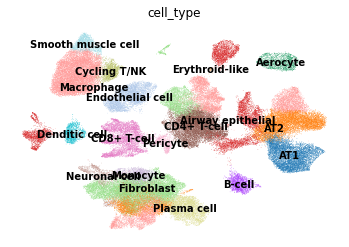

In [63]:
sc.pl.umap(adata, color = ['cell_type'], frameon = False, legend_loc = "on data")

In [64]:
adata

AnnData object with n_obs × n_vars = 99249 × 20631
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell_type'
    var: 'n_cells'
    uns: 'log1p', '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'Sample_colors', 'rank_genes_groups', 'cell_type_colors'
    obsm: '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs', 'X_scVI', 'X_umap'
    layers: 'counts', 'scvi_normalized'
    obsp: 'distances', 'connectivities'

In [65]:
adata.uns['scvi_markers'] = markers_scvi
adata.uns['markers'] = markers

In [73]:
adata.write_h5ad('/content/drive/MyDrive/integrated.h5ad')

In [74]:
model.save('/content/drive/MyDrive/model.model')

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Analysis

In [75]:
import scanpy as sc
import scvi
import seaborn as sns
import numpy as np
import pandas as pd

## Counting cells

In [ ]:
adata = sc.read_h5ad('integrated.h5ad')

In [76]:
adata.obs.Sample.unique().tolist()

['L12cov',
 'L11cov',
 'L04covaddon',
 'C51ctr',
 'L10cov',
 'C56ctr',
 'C55ctr',
 'L08cov',
 'C57ctr',
 'L04cov',
 'L19cov',
 'L07cov',
 'L01cov',
 'C53ctr',
 'L21cov',
 'L18cov',
 'L09cov',
 'L22cov',
 'C52ctr',
 'L16cov',
 'L13cov',
 'L15cov',
 'C54ctr',
 'L05cov',
 'L03cov',
 'L06cov',
 'L17cov']

In [77]:
def map_condition(x):
    if 'cov' in x:
        return 'COVID19'
    else:
        return 'control'

In [78]:
adata.obs['condition'] = adata.obs.Sample.map(map_condition)
adata.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell_type,condition
ATCCACCGTGCCGAAA-1_19,L12cov,False,2185,2185,4659.0,0.0,0.0,6.0,0.128783,0,0,2,2.151463,CD4+ T-cell,COVID19
TCATTTGTCCAACTGA-1_19,L12cov,False,2168,2168,4541.0,0.0,0.0,31.0,0.682669,0,0,3,2.207018,AT2,COVID19
AAGGAATTCTCCTGCA-1_19,L12cov,False,2200,2200,4477.0,0.0,0.0,23.0,0.513737,0,0,2,2.238639,CD4+ T-cell,COVID19
CAACGATGTCTACACA-1_19,L12cov,False,2200,2200,4467.0,0.0,0.0,27.0,0.604433,0,0,2,2.243158,CD4+ T-cell,COVID19
TCATCCGCACTGTCCT-1_19,L12cov,False,2195,2195,4382.0,0.0,0.0,6.0,0.136924,0,0,2,2.283626,CD4+ T-cell,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGTGTCTTCTCGCAGG-1_23,L17cov,False,360,360,436.0,0.0,0.0,5.0,1.146789,0,0,11,23.041475,Fibroblast,COVID19
GATGACTAGTTCTCTT-1_23,L17cov,False,338,338,401.0,0.0,0.0,0.0,0.000000,0,0,10,24.937656,Fibroblast,COVID19
TCGTCCACAGGGAATC-1_23,L17cov,False,302,302,415.0,0.0,0.0,0.0,0.000000,0,0,2,24.330900,CD4+ T-cell,COVID19
TAACCAGCAGTTGTTG-1_23,L17cov,False,310,310,403.0,0.0,0.0,1.0,0.248139,0,0,18,24.813896,B-cell,COVID19


In [79]:
num_tot_cells = adata.obs.groupby(['Sample']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.doublet))
num_tot_cells

{'C51ctr': 5525,
 'C52ctr': 4035,
 'C53ctr': 6275,
 'C54ctr': 3951,
 'C55ctr': 5141,
 'C56ctr': 3615,
 'C57ctr': 4260,
 'L01cov': 2748,
 'L03cov': 3619,
 'L04cov': 3115,
 'L04covaddon': 4134,
 'L05cov': 2500,
 'L06cov': 5744,
 'L07cov': 4238,
 'L08cov': 3396,
 'L09cov': 3079,
 'L10cov': 1382,
 'L11cov': 2500,
 'L12cov': 3195,
 'L13cov': 4330,
 'L15cov': 3562,
 'L16cov': 1592,
 'L17cov': 3923,
 'L18cov': 2434,
 'L19cov': 2184,
 'L21cov': 2969,
 'L22cov': 5803}

In [80]:
cell_type_counts = adata.obs.groupby(['Sample', 'condition', 'cell_type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()
cell_type_counts = cell_type_counts[cell_type_counts.columns[0:4]]
cell_type_counts

,Sample,condition,cell_type,doublet
0,C51ctr,control,AT1,754
1,C51ctr,control,AT2,691
2,C51ctr,control,Airway epithelial,447
3,C51ctr,control,B-cell,28
4,C51ctr,control,CD4+ T-cell,132
...,...,...,...,...
441,L22cov,COVID19,Monocyte,598
442,L22cov,COVID19,Neuronal cell,53
443,L22cov,COVID19,Pericyte,61
444,L22cov,COVID19,Plasma cell,16


In [81]:
cell_type_counts['total_cells'] = cell_type_counts.Sample.map(num_tot_cells).astype(int)

cell_type_counts['frequency'] = cell_type_counts.doublet / cell_type_counts.total_cells

cell_type_counts

,Sample,condition,cell_type,doublet,total_cells,frequency
0,C51ctr,control,AT1,754,5525,0.136471
1,C51ctr,control,AT2,691,5525,0.125068
2,C51ctr,control,Airway epithelial,447,5525,0.080905
3,C51ctr,control,B-cell,28,5525,0.005068
4,C51ctr,control,CD4+ T-cell,132,5525,0.023891
...,...,...,...,...,...,...
441,L22cov,COVID19,Monocyte,598,5803,0.103050
442,L22cov,COVID19,Neuronal cell,53,5803,0.009133
443,L22cov,COVID19,Pericyte,61,5803,0.010512
444,L22cov,COVID19,Plasma cell,16,5803,0.002757


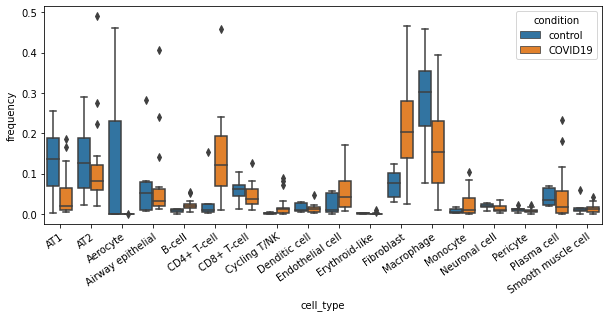

<Figure size 432x288 with 0 Axes>

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,4))

ax = sns.boxplot(data = cell_type_counts, x = 'cell_type', y = 'frequency', hue = 'condition')

plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')

plt.show()

plt.savefig('analysis.png', dpi=500)


left non-parametric test between each group.

## DE

In [118]:
subset = adata[adata.obs['cell_type'].isin(['AT1', 'AT2'])].copy()

In [102]:
# subset = subset.raw.to_adata() #need to run this if you scaled/regress your data and have negative numbers


In [ ]:
#two options: SCVI or diffxpy

In [89]:
!pip install diffxpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.0 MB/s 
     |████████████████████████████████| 140 kB 25.4 MB/s 
     |████████████████████████████████| 77 kB 8.2 MB/s 


In [90]:
import diffxpy.api as de

In [120]:
subset.X = subset.X.toarray() # sparse to dense

In [121]:
len(subset.var)

20631

In [105]:
subset

AnnData object with n_obs × n_vars = 18331 × 20631
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell_type', 'condition'
    var: 'n_cells'
    uns: 'log1p', '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'Sample_colors', 'rank_genes_groups', 'cell_type_colors', 'scvi_markers', 'markers'
    obsm: '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs', 'X_scVI', 'X_umap'
    obsp: 'distances', 'connectivities'

In [122]:
sc.pp.filter_genes(subset, min_cells=100)

In [107]:
len(subset.var)

13914

In [108]:
subset.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell_type,condition
TCATTTGTCCAACTGA-1_19,L12cov,False,2168,2168,4541.0,0.0,0.0,31.0,0.682669,0,0,3,2.207018,AT2,COVID19
CATAGACCACCATTCC-1_19,L12cov,False,2012,2012,4285.0,0.0,0.0,6.0,0.140023,0,0,3,2.336449,AT2,COVID19
CCACACTGTAGCTAAA-1_19,L12cov,False,2192,2192,4224.0,0.0,0.0,17.0,0.402462,0,0,3,2.374169,AT2,COVID19
AGTAACCGTACAGAGC-1_19,L12cov,False,2218,2218,4160.0,0.0,0.0,33.0,0.793269,0,0,3,2.411963,AT2,COVID19
TCAGTGACATTGGATC-1_19,L12cov,False,2060,2060,4069.0,0.0,0.0,6.0,0.147456,0,0,3,2.460630,AT2,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCCATTCCATTCGGGC-1_23,L17cov,False,300,300,465.0,0.0,0.0,0.0,0.000000,0,0,3,21.551723,AT2,COVID19
TCAGCAAGTGGCCTCA-1_23,L17cov,False,324,324,412.0,0.0,0.0,0.0,0.000000,0,0,3,24.271845,AT2,COVID19
GTGTCCTGTAGTGGCA-1_23,L17cov,False,356,356,464.0,0.0,0.0,2.0,0.431034,0,0,3,21.551723,AT2,COVID19
CACAGGCGTCAGTTTG-1_23,L17cov,False,338,338,432.0,0.0,0.0,0.0,0.000000,0,0,4,23.255814,AT1,COVID19


In [109]:
subset

AnnData object with n_obs × n_vars = 18331 × 13914
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell_type', 'condition'
    var: 'n_cells'
    uns: 'log1p', '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'Sample_colors', 'rank_genes_groups', 'cell_type_colors', 'scvi_markers', 'markers'
    obsm: '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs', 'X_scVI', 'X_umap'
    obsp: 'distances', 'connectivities'

In [110]:
#if want to test between covid/non covid
# res = de.test.wald(data=subset,
#              formula_loc= '~ 1 + condition',
#              factor_loc_totest='condition'
#                   )


res = de.test.wald(data=subset,
             formula_loc= '~ 1 + cell_type',
             factor_loc_totest='cell_type'
                  )

/usr/local/lib/python3.7/dist-packages/batchglm/models/base_glm/utils.py:111: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  for g in np.unique(grouping)
/usr/local/lib/python3.7/dist-packages/batchglm/models/base_glm/utils.py:111: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  for g in np.unique(grouping)
/usr/local/lib/pyt

training location model: False
training scale model: True
iter   0: ll=193005392.043736
iter   1: ll=193005392.043736, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
Fitting 13914 dispersion models: (progress not available with multiprocessing)

error: ignored

In [ ]:
dedf = res.summary().sort_values('log2fc', ascending = False).reset_index(drop = True)
dedf

In [ ]:
subset.obs.cell_type.unique()

In [ ]:
most_up = dedf.iloc[0].gene
i = np.where(subset.var_names == most_up)[0][0]

a = subset[subset.obs.cell_type == 'AT1'].X[:, i]
b = subset[subset.obs.cell_type == 'AT2'].X[:, i]
print(f"{most_up} expression:")
print(f"AT1: {a.mean()}")
print(f"AT2: {b.mean()}")


In [ ]:
dedf['log2fc'] = dedf['log2fc']*-1
dedf = dedf.sort_values('log2fc', ascending = False).reset_index(drop = True)
dedf

In [ ]:
dedf = dedf[(dedf.qval < 0.05) & (abs(dedf.log2fc) > .5)]
dedf

In [ ]:
dedf = dedf[dedf['mean'] > 0.15]
dedf

In [ ]:
genes_to_show = dedf[-25:].gene.tolist() + dedf[:25].gene.tolist() #top 25 and bottom 25 from sorted df

In [ ]:
sc.pl.heatmap(subset, genes_to_show, groupby='cell_type', swap_axes=True, 'de_withdiffxpy.png')

In [ ]:
#DE with scvi

In [ ]:
model  = scvi.model.SCVI.load('model.model', adata)

In [111]:
model

SCVI Model with the following params: 
n_hidden: 128, n_latent: 10, n_layers: 1, dropout_rate: 0.1, dispersion: gene, gene_likelihood: zinb, 
latent_distribution: normal
Training status: Trained

In [112]:
scvi_de = model.differential_expression(
    idx1 = [adata.obs['cell_type'] == 'AT1'],
    idx2 = [adata.obs['cell_type'] == 'AT2']
    )

#any set of cells vs any set of cells
# scvi_de = model.differential_expression(
#     idx1 = [(adata.obs['cell_type'].isin(['AT1', 'AT2'])) & (adata.obs.condition == 'COVID19')],
#     idx2 = [(adata.obs['cell_type'].isin(['AT1', 'AT2'])) & (adata.obs.condition == 'control')]
#     )

DE...: 100%|██████████| 1/1 [00:09<00:00,  9.47s/it]


In [113]:
scvi_de

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
SH3GL3,0.9990,0.0010,6.906745,0.000151,0.000003,0.0,0.25,6.658543,6.856168,2.099779,-3.061642,12.660542,0.165989,0.001455,0.127615,0.001369,1.177350,0.007291,True
TTLL7,0.9976,0.0024,6.029880,0.000434,0.000029,0.0,0.25,4.310053,4.069232,1.860632,-1.663489,10.521803,0.547037,0.015061,0.344169,0.012665,3.926694,0.074943,True
AL355499.1,0.9974,0.0026,5.949637,0.001033,0.000021,0.0,0.25,7.333545,7.040322,3.207699,-4.397660,16.636936,1.297974,0.009499,0.544771,0.004963,8.960159,0.032558,True
C10orf67,0.9974,0.0026,5.949637,0.000175,0.000003,0.0,0.25,6.426543,6.570370,2.348768,-2.727512,13.172156,0.229494,0.000428,0.152897,0.000428,1.498889,0.001402,True
SEMA3E,0.9972,0.0028,5.875328,0.000122,0.000001,0.0,0.25,7.078500,7.227812,2.842952,-3.598370,15.079792,0.167644,0.000342,0.105342,0.000171,1.050884,0.003064,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RAF1,0.4250,0.5750,-0.302281,0.000137,0.000142,0.0,0.25,-0.044739,-0.053264,0.322020,-1.122666,1.428185,0.208125,0.225485,0.176674,0.187917,1.439182,1.399415,False
EP300,0.4046,0.5954,-0.386335,0.000192,0.000191,0.0,0.25,0.006660,-0.000865,0.307738,-1.163906,1.348288,0.267418,0.313195,0.217607,0.243625,1.856813,1.948393,False
SNW1,0.3932,0.6068,-0.433881,0.000037,0.000039,0.0,0.25,-0.067563,-0.062236,0.297232,-1.082685,1.324103,0.062604,0.073849,0.059443,0.068544,0.434958,0.436975,False
ARID2,0.3906,0.6094,-0.444791,0.000237,0.000246,0.0,0.25,-0.047982,-0.067584,0.305114,-1.022471,1.873724,0.314222,0.371554,0.245297,0.275201,2.145782,2.261467,False


In [114]:
scvi_de = scvi_de[(scvi_de['is_de_fdr_0.05']) & (abs(scvi_de.lfc_mean) > .5)]
scvi_de = scvi_de.sort_values('lfc_mean')
scvi_de

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
IFI30,0.9830,0.0170,4.057395,2.785945e-07,0.000147,0.0,0.25,-7.238682,-6.522786,6.334829,-23.166306,9.138590,0.000000,0.272205,0.000000,0.129557,0.000000,1.324717,True
LY86,0.9906,0.0094,4.657600,2.358838e-07,0.000022,0.0,0.25,-7.035025,-7.046183,3.802190,-21.855312,3.936811,0.000150,0.041588,0.000150,0.032774,0.003272,0.233116,True
CHI3L1,0.9898,0.0102,4.575114,1.416092e-06,0.000029,0.0,0.25,-7.029650,-7.326096,3.661052,-19.634186,4.507170,0.000451,0.048776,0.000451,0.029351,0.003058,0.241143,True
LY86-AS1,0.9952,0.0048,5.334326,1.295742e-07,0.000010,0.0,0.25,-7.002117,-7.116995,3.172940,-16.876362,3.694782,0.000000,0.013007,0.000000,0.009670,0.000000,0.050443,True
HLA-DRA,0.9770,0.0230,3.748992,2.608469e-06,0.000322,0.0,0.25,-6.724369,-6.635080,5.952190,-22.740089,11.351503,0.001354,0.549034,0.000752,0.176450,0.010116,2.976685,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CACNG4,0.9964,0.0036,5.623212,8.570589e-05,0.000003,0.0,0.25,6.937790,7.202631,2.564471,-3.870658,13.551585,0.122648,0.003594,0.100978,0.003252,0.916342,0.025956,True
SEMA3E,0.9972,0.0028,5.875328,1.218154e-04,0.000001,0.0,0.25,7.078500,7.227812,2.842952,-3.598370,15.079792,0.167644,0.000342,0.105342,0.000171,1.050884,0.003064,True
ROR1-AS1,0.9922,0.0078,4.845800,1.175808e-04,0.000002,0.0,0.25,7.142485,6.995387,3.582556,-3.629118,20.484798,0.194732,0.001626,0.133333,0.001112,1.239419,0.005090,True
AL355499.1,0.9974,0.0026,5.949637,1.032963e-03,0.000021,0.0,0.25,7.333545,7.040322,3.207699,-4.397660,16.636936,1.297974,0.009499,0.544771,0.004963,8.960159,0.032558,True


In [115]:
scvi_de = scvi_de[(scvi_de.raw_normalized_mean1 > .5) | (scvi_de.raw_normalized_mean2 > .5)]
scvi_de

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
IFI30,0.9830,0.0170,4.057395,2.785945e-07,0.000147,0.0,0.25,-7.238682,-6.522786,6.334829,-23.166306,9.138590,0.000000,0.272205,0.000000,0.129557,0.000000,1.324717,True
HLA-DRA,0.9770,0.0230,3.748992,2.608469e-06,0.000322,0.0,0.25,-6.724369,-6.635080,5.952190,-22.740089,11.351503,0.001354,0.549034,0.000752,0.176450,0.010116,2.976685,True
ALOX15B,0.9880,0.0120,4.410775,1.320171e-05,0.000229,0.0,0.25,-6.449562,-6.716694,3.703459,-15.477133,5.685482,0.013093,0.352128,0.009180,0.213418,0.100314,2.423606,True
C1QB,0.9770,0.0230,3.748992,4.570187e-07,0.000175,0.0,0.25,-6.333434,-5.751778,6.711440,-22.974152,11.732114,0.000000,0.272975,0.000000,0.115523,0.000000,1.386630,True
HLA-DPA1,0.9864,0.0136,4.283991,1.399917e-06,0.000070,0.0,0.25,-6.137611,-6.026608,3.692105,-17.009544,5.520402,0.000150,0.120058,0.000150,0.079668,0.000851,0.579196,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CACNG4,0.9964,0.0036,5.623212,8.570589e-05,0.000003,0.0,0.25,6.937790,7.202631,2.564471,-3.870658,13.551585,0.122648,0.003594,0.100978,0.003252,0.916342,0.025956,True
SEMA3E,0.9972,0.0028,5.875328,1.218154e-04,0.000001,0.0,0.25,7.078500,7.227812,2.842952,-3.598370,15.079792,0.167644,0.000342,0.105342,0.000171,1.050884,0.003064,True
ROR1-AS1,0.9922,0.0078,4.845800,1.175808e-04,0.000002,0.0,0.25,7.142485,6.995387,3.582556,-3.629118,20.484798,0.194732,0.001626,0.133333,0.001112,1.239419,0.005090,True
AL355499.1,0.9974,0.0026,5.949637,1.032963e-03,0.000021,0.0,0.25,7.333545,7.040322,3.207699,-4.397660,16.636936,1.297974,0.009499,0.544771,0.004963,8.960159,0.032558,True


In [116]:
genes_to_show = scvi_de[-25:].index.tolist() + scvi_de[:25].index.tolist() #top 25 and bottom 25 from sorted df


In [123]:
subset

AnnData object with n_obs × n_vars = 18331 × 13914
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell_type', 'condition'
    var: 'n_cells'
    uns: 'log1p', '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'Sample_colors', 'rank_genes_groups', 'cell_type_colors', 'scvi_markers', 'markers'
    obsm: '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs', 'X_scVI', 'X_umap'
    layers: 'counts', 'scvi_normalized'
    obsp: 'distances', 'connectivities'

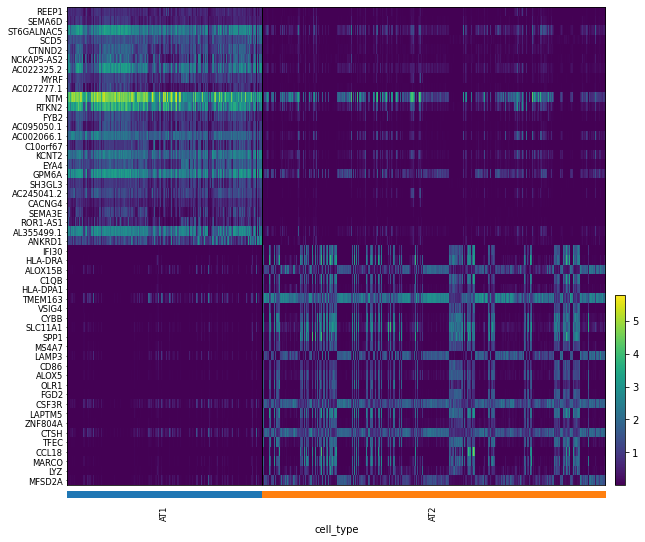

In [124]:
sc.pl.heatmap(subset, genes_to_show, groupby='cell_type', swap_axes=True, layer = 'scvi_normalized',
              log = True)

# GO enrichment

In [125]:
!pip install gseapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 5.1 MB/s 


In [126]:
import gseapy as gp #this method requires internet connection

In [ ]:
gp.get_library_name()
# 'GO_Biological_Process_2021',
#'KEGG_2021_Human',

In [ ]:
subset

In [128]:
enr = gp.enrichr(gene_list= scvi_de[scvi_de.lfc_mean > 0].index.tolist(), # just upregulated genes, my guess for scvi model de
                 gene_sets=['KEGG_2021_Human','GO_Biological_Process_2021'],
                 organism='human', # don't forget to set organism to the one you desired!
                 outdir=None, # don't write to disk,
                 background = subset.var_names.tolist()
                )

SCVI Model with the following params: 
n_hidden: 128, n_latent: 10, n_layers: 1, dropout_rate: 0.1, dispersion: gene, gene_likelihood: zinb, 
latent_distribution: normal
Training status: Trained

In [ ]:
# enr = gp.enrichr(gene_list= dedf[dedf.log2fc > 0].gene.tolist(), # just upregulated genes
#                  gene_sets=['KEGG_2021_Human','GO_Biological_Process_2021'],
#                  organism='human', # don't forget to set organism to the one you desired!
#                  outdir=None, # don't write to disk,
#                  background = subset.var_names.tolist()
#                 )

In [129]:
enr.results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Focal adhesion,25/201,1.795507e-10,4.039892e-08,0,0,5.372382,120.559276,LAMA5;SHC3;LAMA3;PDGFA;LAMC2;ACTB;MYL12A;ACTG1...
1,KEGG_2021_Human,Tight junction,21/169,5.285131e-09,5.945773e-07,0,0,5.332540,101.629516,MAGI1;PATJ;RDX;ACTN4;ARPC5;CGN;ACTB;MYL12A;ACT...
2,KEGG_2021_Human,ECM-receptor interaction,13/88,5.963828e-07,4.472871e-05,0,0,6.438570,92.280046,LAMA5;LAMB3;ITGA3;LAMB2;LAMA3;LAMC2;FRAS1;COL4...
3,KEGG_2021_Human,Hippo signaling pathway,17/163,1.861492e-06,1.047089e-04,0,0,4.342611,57.296987,YAP1;PATJ;TGFB2;WNT3A;FZD6;WNT9A;WTIP;ACTB;ACT...
4,KEGG_2021_Human,Small cell lung cancer,12/92,6.158134e-06,2.771160e-04,0,0,5.559751,66.704434,LAMA5;CCND1;COL4A2;LAMB3;ITGA3;COL4A1;LAMB2;CO...
...,...,...,...,...,...,...,...,...,...,...
2655,GO_Biological_Process_2021,cellular response to DNA damage stimulus (GO:0...,2/350,9.992471e-01,9.999753e-01,0,0,0.206131,0.000155,YAP1;CCND1
2656,GO_Biological_Process_2021,protein transport (GO:0015031),2/369,9.995308e-01,9.999753e-01,0,0,0.195265,0.000092,LMTK2;SPTBN1
2657,GO_Biological_Process_2021,mRNA processing (GO:0006397),1/300,9.997214e-01,9.999753e-01,0,0,0.120038,0.000033,PPARGC1A
2658,GO_Biological_Process_2021,cellular macromolecule biosynthetic process (G...,1/314,9.998095e-01,9.999753e-01,0,0,0.114585,0.000022,ST3GAL4


## comparisons

SCVI Model with the following params: 
n_hidden: 128, n_latent: 10, n_layers: 1, dropout_rate: 0.1, dispersion: gene, gene_likelihood: zinb, 
latent_distribution: normal
Training status: Trained

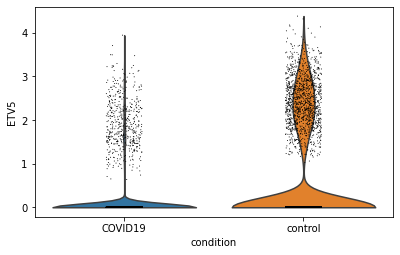

SCVI Model with the following params: 
n_hidden: 128, n_latent: 10, n_layers: 1, dropout_rate: 0.1, dispersion: gene, gene_likelihood: zinb, 
latent_distribution: normal
Training status: Trained

/usr/local/lib/python3.7/dist-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


In [130]:
sc.pl.violin(subset[subset.obs.cell_type == 'AT2'], 'ETV5', groupby='condition')

In [131]:
from scipy import stats

In [132]:
temp = subset[subset.obs.cell_type == 'AT2']

i = np.where(temp.var_names == 'ETV5')[0][0]

In [133]:
a = temp[temp.obs.condition == 'COVID19'].X[:,i]
b = temp[temp.obs.condition == 'control'].X[:,i]

In [135]:
a

ArrayView([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [134]:
stats.mannwhitneyu(a, b)

MannwhitneyuResult(statistic=11645725.0, pvalue=1.2080690571906768e-285)

## Score gene signature

In [137]:
#gene signature, ie, input list of genes from user
with open('datp_sig.txt') as f:
    datp_sig = [x.strip() for x in list(f)]


In [138]:
datp_sig

['FTL',
 'KRT8',
 'ACTB',
 'S100A6',
 'B2M',
 'TMSB4X',
 'CDKN1A',
 'CLDN4',
 'HLA-B',
 'HLA-A',
 'RPL36',
 'ACTG1',
 'RPL7A',
 'RPS19',
 'RPL8',
 'EEF1A1',
 'SFN',
 'RPL41',
 'RPLP1',
 'RPL13A',
 'RPS28',
 'RPL13',
 'RPS27A',
 'RPL37A',
 'RPS2',
 'RPL28',
 'RPLP0',
 'RPL3',
 'PTMA',
 'RPL10',
 'EEF2',
 'HSP90AB1',
 'MYL6',
 'CD63',
 'TMBIM6',
 'CCND1',
 'RPL21',
 'KRT18',
 'P4HB',
 'RPS3',
 'JUND',
 'CEACAM6',
 'HSP90AA1',
 'TPT1',
 'KRT19',
 'CD151',
 'H3F3B',
 'SOX4',
 'KRT7',
 'SDC1',
 'NORAD',
 'CANX',
 'FLNA',
 'PKM',
 'RPS24',
 'MT-ND4',
 'ZFP36L1',
 'MT-CO2',
 'MTRNR2L12',
 'UBC',
 'TRAM1',
 'MT-ND2',
 'MT-CO3',
 'MT-ND1',
 'S100A10',
 'MT-CO1',
 'SQSTM1',
 'MT-ATP6',
 'LAMB3',
 'TAPBP',
 'RPS9',
 'TM4SF1',
 'MT-ND4L',
 'STOM',
 'TMEM30A',
 'CD59',
 'PLXNB2',
 'MT-ND5',
 'PABPC1',
 'MT-CYB',
 'NPC2',
 'TPM4',
 'ANXA2',
 'MT-ND3',
 'ITGA2',
 'TKT',
 'ITGB1',
 'TNFRSF1A',
 'APLP2',
 'DHCR24',
 'MYH9',
 'ICAM1',
 'MUC1',
 'MSN',
 'GSN',
 'CDC42',
 'RAC1',
 'YWHAZ',
 'CALM2',
 'MT-

In [139]:
sc.tl.score_genes(subset, datp_sig, score_name = 'datp')

In [140]:
subset.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell_type,condition,datp
TCATTTGTCCAACTGA-1_19,L12cov,False,2168,2168,4541.0,0.0,0.0,31.0,0.682669,0,0,3,2.207018,AT2,COVID19,0.494175
CATAGACCACCATTCC-1_19,L12cov,False,2012,2012,4285.0,0.0,0.0,6.0,0.140023,0,0,3,2.336449,AT2,COVID19,0.051677
CCACACTGTAGCTAAA-1_19,L12cov,False,2192,2192,4224.0,0.0,0.0,17.0,0.402462,0,0,3,2.374169,AT2,COVID19,0.310766
AGTAACCGTACAGAGC-1_19,L12cov,False,2218,2218,4160.0,0.0,0.0,33.0,0.793269,0,0,3,2.411963,AT2,COVID19,0.298870
TCAGTGACATTGGATC-1_19,L12cov,False,2060,2060,4069.0,0.0,0.0,6.0,0.147456,0,0,3,2.460630,AT2,COVID19,0.133678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCCATTCCATTCGGGC-1_23,L17cov,False,300,300,465.0,0.0,0.0,0.0,0.000000,0,0,3,21.551723,AT2,COVID19,-0.018185
TCAGCAAGTGGCCTCA-1_23,L17cov,False,324,324,412.0,0.0,0.0,0.0,0.000000,0,0,3,24.271845,AT2,COVID19,0.257904
GTGTCCTGTAGTGGCA-1_23,L17cov,False,356,356,464.0,0.0,0.0,2.0,0.431034,0,0,3,21.551723,AT2,COVID19,0.110542
CACAGGCGTCAGTTTG-1_23,L17cov,False,338,338,432.0,0.0,0.0,0.0,0.000000,0,0,4,23.255814,AT1,COVID19,0.063010


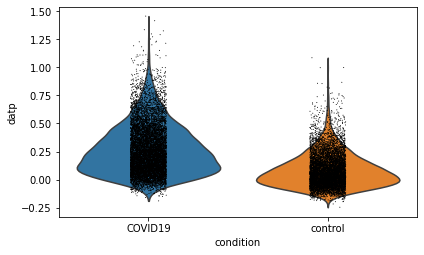

In [141]:
sc.pl.violin(subset, 'datp', groupby='condition')

In [142]:
a = subset[subset.obs.condition == 'COVID19'].obs.datp.values
b = subset[subset.obs.condition == 'control'].obs.datp.values
stats.mannwhitneyu(a, b)

MannwhitneyuResult(statistic=63772369.0, pvalue=0.0)

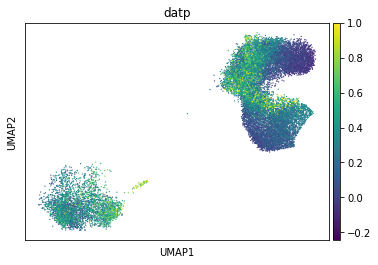

In [143]:
sc.pl.umap(subset, color = 'datp', vmax = 1)

In [ ]:
#for thumbnail

In [144]:
from matplotlib.pyplot import rc_context


In [145]:
adata

AnnData object with n_obs × n_vars = 99249 × 20631
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell_type', 'condition'
    var: 'n_cells'
    uns: 'log1p', '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'Sample_colors', 'rank_genes_groups', 'cell_type_colors', 'scvi_markers', 'markers'
    obsm: '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs', 'X_scVI', 'X_umap'
    layers: 'counts', 'scvi_normalized'
    obsp: 'distances', 'connectivities'

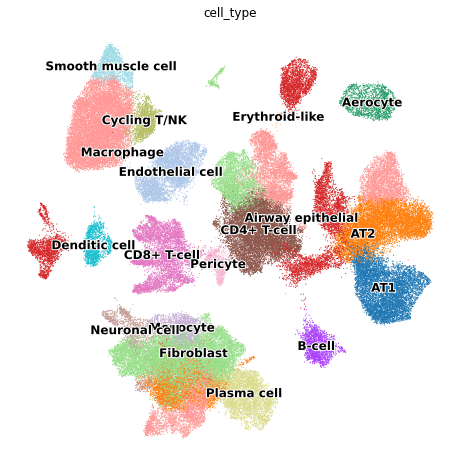

In [146]:
with rc_context({'figure.figsize': (8,8)}):
    sc.pl.umap(adata, color = ['cell_type'], frameon = False, s = 5, legend_loc = 'on data',
              legend_fontsize=12, legend_fontoutline=2)

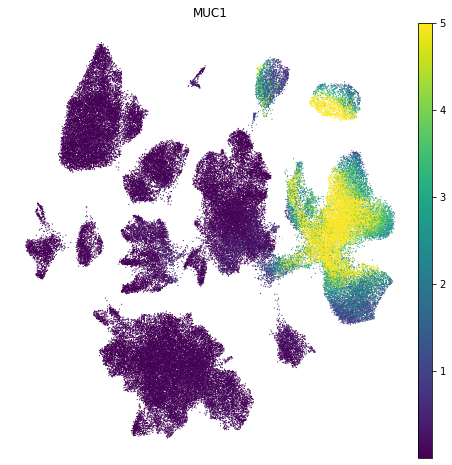

In [147]:
with rc_context({'figure.figsize': (8,8)}):
    sc.pl.umap(adata, color = ['MUC1'], frameon = False, layer = 'scvi_normalized', vmax = 5, s = 5)